In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("Iris.csv",index_col = 'Id')

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [13]:
df.shape

(150, 5)

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('Species',axis=1)
y = df['Species']
print(X)
print(y)

train_X ,test_X , train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=42)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                           
1              5.1           3.5            1.4           0.2
2              4.9           3.0            1.4           0.2
3              4.7           3.2            1.3           0.2
4              4.6           3.1            1.5           0.2
5              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
146            6.7           3.0            5.2           2.3
147            6.3           2.5            5.0           1.9
148            6.5           3.0            5.2           2.0
149            6.2           3.4            5.4           2.3
150            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-v

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [23]:
knn_pred = knn.predict(test_X)
knn_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [28]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(test_y,knn_pred))
print(confusion_matrix(test_y,knn_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [33]:
err = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_X,train_y)
    pred_k = knn.predict(test_X)
    err.append(np.mean(pred_k!=test_y))

Text(0, 0.5, 'Error Rate')

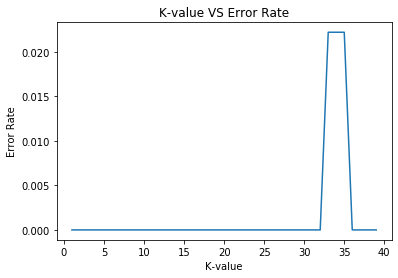

In [37]:
import seaborn as sns

sns.lineplot(range(1,40),err)
plt.title('K-value VS Error Rate')
plt.xlabel('K-value')
plt.ylabel('Error Rate')

## As we can see for all k values error is almost zero except 30-35.